In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [42]:
DATADIR = "TrainingPhotos"

TEMP_FILES_DIRECTORY = "./TEMP/"

CATEGORIES = ["CAT", "CHICKEN", "DOG", "HORSE"]
IMG_SIZE = 100

In [33]:
training_data = []
categories_indexes = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e: 
                pass
        #print('\n')
        #print(category + " items: " + str(len(training_data)) + '\n')

create_training_data()

100%|██████████| 150/150 [00:00<00:00, 704.63it/s]


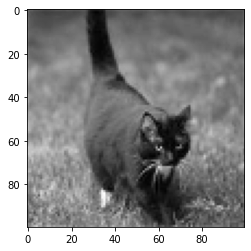

0


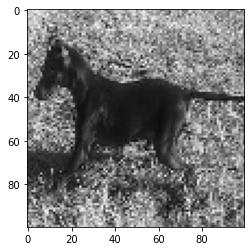

2


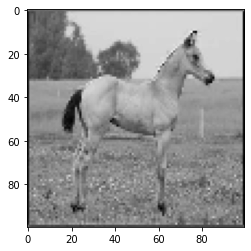

3


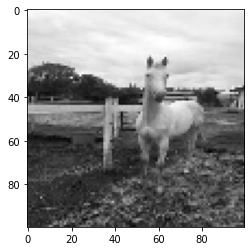

3


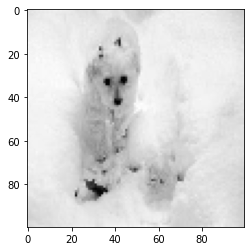

2


In [51]:
import random

random.shuffle(training_data)

for sample in training_data[:5]:
    plt.imshow(sample[0], cmap='gray') # Graficamos y mostramos la nueva imagen
    plt.show()
    print(sample[1])

In [52]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[100]
   [ 96]
   [ 95]
   ...
   [ 86]
   [ 86]
   [ 88]]

  [[100]
   [ 82]
   [ 80]
   ...
   [ 77]
   [ 77]
   [ 92]]

  [[ 96]
   [ 87]
   [ 77]
   ...
   [ 81]
   [ 81]
   [ 93]]

  ...

  [[ 94]
   [ 90]
   [119]
   ...
   [ 91]
   [ 81]
   [ 69]]

  [[128]
   [123]
   [161]
   ...
   [101]
   [104]
   [101]]

  [[124]
   [136]
   [158]
   ...
   [115]
   [117]
   [ 93]]]]


In [37]:
data = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.savetxt('training_data.csv', data, delimiter=',')
loaded_data = np.loadtxt('training_data.csv', delimiter=',')

print(loaded_data)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [54]:
np.save(TEMP_FILES_DIRECTORY + 'training_X', X)
np.save(TEMP_FILES_DIRECTORY + 'training_Y', y)


In [57]:
print(X[0])

[[[0.39215686]
  [0.37647059]
  [0.37254902]
  ...
  [0.3372549 ]
  [0.3372549 ]
  [0.34509804]]

 [[0.39215686]
  [0.32156863]
  [0.31372549]
  ...
  [0.30196078]
  [0.30196078]
  [0.36078431]]

 [[0.37647059]
  [0.34117647]
  [0.30196078]
  ...
  [0.31764706]
  [0.31764706]
  [0.36470588]]

 ...

 [[0.36862745]
  [0.35294118]
  [0.46666667]
  ...
  [0.35686275]
  [0.31764706]
  [0.27058824]]

 [[0.50196078]
  [0.48235294]
  [0.63137255]
  ...
  [0.39607843]
  [0.40784314]
  [0.39607843]]

 [[0.48627451]
  [0.53333333]
  [0.61960784]
  ...
  [0.45098039]
  [0.45882353]
  [0.36470588]]]
